# Milestone 5: Joining database tables and visualization of data

In [39]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

# Connecting to the database
conn = sqlite3.connect('milestone5.db')

# Loading data into DataFrames
university_data = pd.read_sql('SELECT * FROM university_scores', conn)
countries_data = pd.read_sql('SELECT * FROM world_countries', conn)
freedom_indices_data = pd.read_sql('SELECT * FROM freedom_indices', conn)

# Merging data on the "country" column
merged_df = university_data.merge(countries_data, on='country', how='inner') \
                           .merge(freedom_indices_data, on='country', how='inner')

# Closing the database connection
conn.close()

# Displaying the first few rows of the merged DataFrame
merged_df.head()


,world_rank,university_name,country,teaching_score,international_score,research_score,citations_score,industry_income_score,total_score,num_students,...,href_flag,current_president,freedom_in_world_2024,score_change_since_2023,index_of_economic_freedom_2024,economic_score,press_freedom_index_2023,press_freedom_score,democracy_index_2023,democracy_score
0,6,University of Cambridge,United Kingdom,90.5,77.7,94.1,94.0,57.0,91.2,18812,...,https://restfulcountries.com/assets/images/fla...,None,91.0,-2.0,moderately free,68.6,satisfactory,78.51,full democracy,8.28
1,6,University of Oxford,United Kingdom,88.2,77.2,93.9,95.1,73.5,91.2,19919,...,https://restfulcountries.com/assets/images/fla...,None,91.0,-2.0,moderately free,68.6,satisfactory,78.51,full democracy,8.28
2,9,Imperial College London,United Kingdom,89.2,90.0,94.5,88.3,92.9,90.6,15060,...,https://restfulcountries.com/assets/images/fla...,None,91.0,-2.0,moderately free,68.6,satisfactory,78.51,full democracy,8.28
3,22,University College London,United Kingdom,74.0,90.8,81.6,80.6,39.0,78.4,26607,...,https://restfulcountries.com/assets/images/fla...,None,91.0,-2.0,moderately free,68.6,satisfactory,78.51,full democracy,8.28
4,40,University of Edinburgh,United Kingdom,59.9,67.3,61.9,86.8,42.2,69.2,25774,...,https://restfulcountries.com/assets/images/fla...,None,91.0,-2.0,moderately free,68.6,satisfactory,78.51,full democracy,8.28


## Visualization 1: Top 10 countries by average university total score

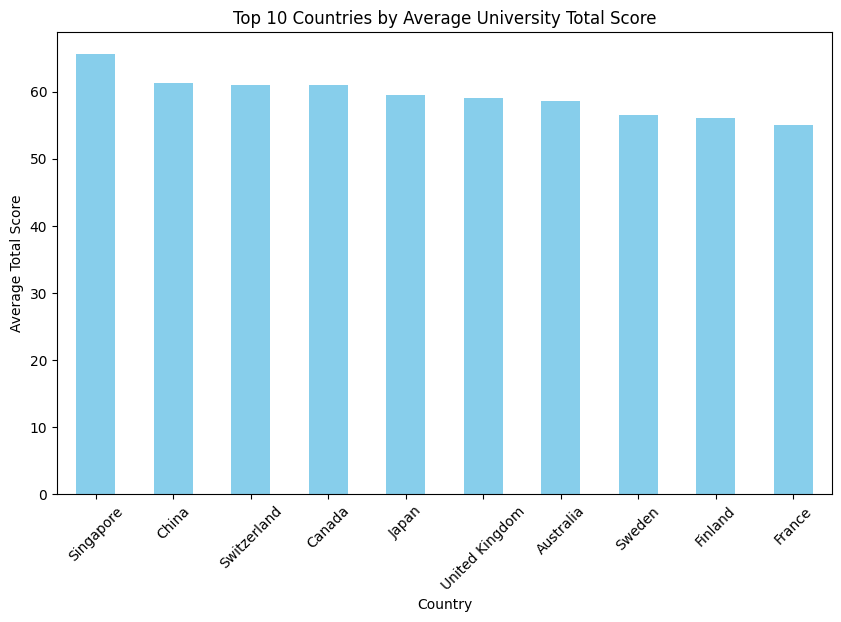

In [40]:
top_countries = merged_df.groupby('country')['total_score'].mean().nlargest(10)

# Grouping by country, calculating average total score, and plotting the top 10 countries as a bar chart.
plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries by Average University Total Score')
plt.xlabel('Country')
plt.ylabel('Average Total Score')
plt.xticks(rotation=45)
plt.show()


## Visualization 2: Distribution of Universities Across Regions

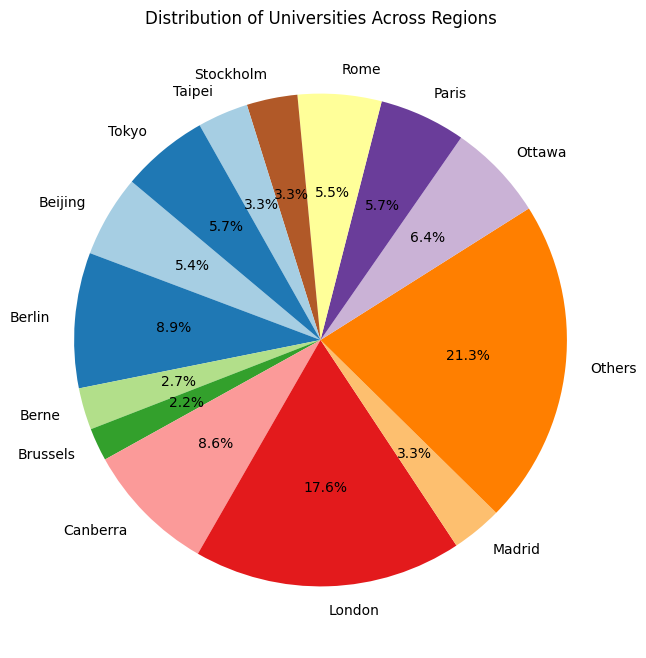

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Grouping data by continent and count universities
continent_university_count = merged_df.groupby('continent')['university_name'].count().reset_index()
continent_university_count.columns = ['continent', 'university_count']

# Calculating total universities for percentage computation
total_universities = continent_university_count['university_count'].sum()
continent_university_count['percentage'] = (continent_university_count['university_count'] / total_universities) * 100

# Categorizing small percentages (<2%) as 'Others'
continent_university_count['continent'] = continent_university_count.apply(
    lambda row: 'Others' if row['percentage'] < 2 else row['continent'], axis=1
)

# Re-aggregating data to include 'Others'
final_continent_data = continent_university_count.groupby('continent').sum().reset_index()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    final_continent_data['university_count'],
    labels=final_continent_data['continent'],
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired.colors
)
plt.title('Distribution of Universities Across Regions')
plt.show()


## Visualization 3: Freedom Scores by Country

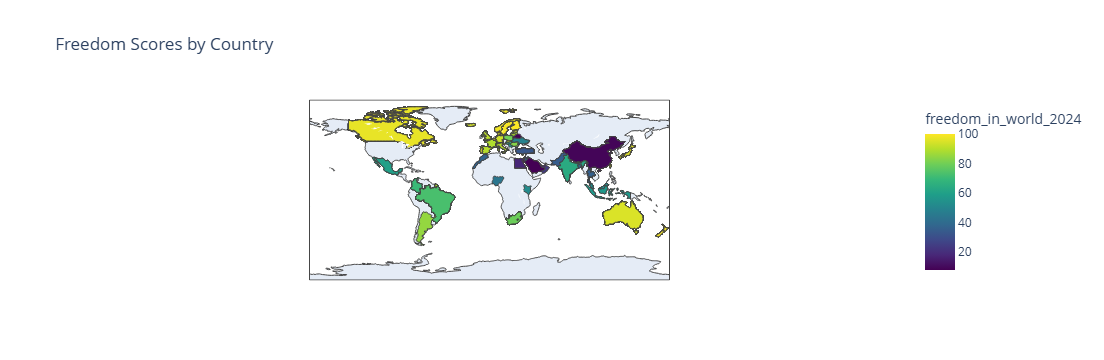

In [42]:
import plotly.express as px

# Creating a choropleth map showing freedom scores by country, with additional hover data.

fig = px.choropleth(
    merged_df,
    locations="iso_alpha3",  # Use ISO Alpha-3 country codes for mapping
    color="freedom_in_world_2024",
    hover_name="country",
    hover_data=["population_count", "democracy_score"],
    title="Freedom Scores by Country",
    color_continuous_scale="Viridis"
)
fig.show()


## Visualization 4: Freedom Scores in Countries with Top Universities

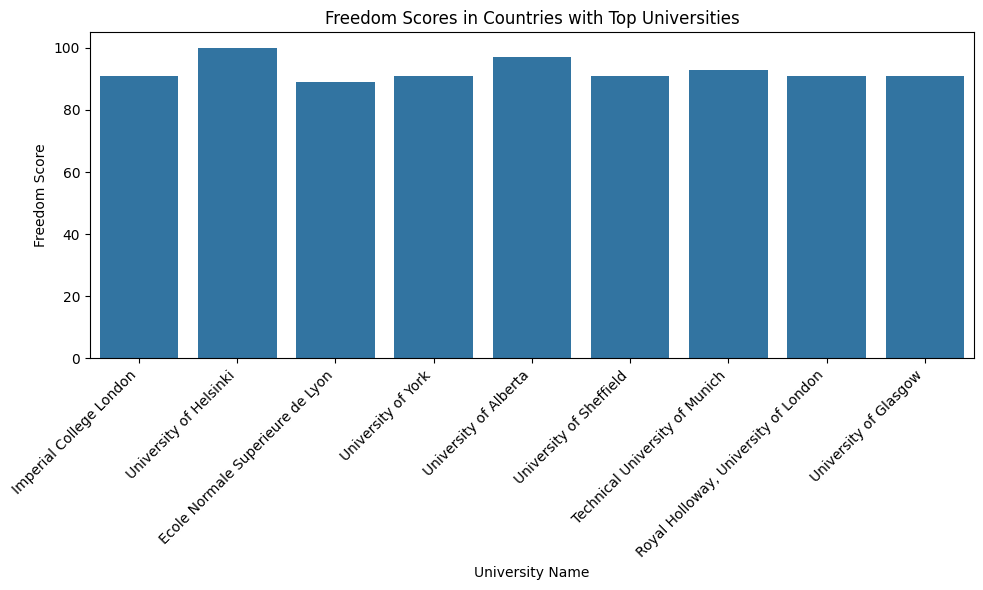

In [43]:
top_universities = merged_df.sort_values("world_rank").head(10)

# Creating and displaying a bar plot of freedom scores for countries with the top 10 universities.
plt.figure(figsize=(10, 6))
sns.barplot(
    x="university_name",
    y="freedom_in_world_2024",
    data=top_universities
)
plt.title("Freedom Scores in Countries with Top Universities")
plt.xlabel("University Name")
plt.ylabel("Freedom Score")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


## Visualization 5: Distribution of Universities by Democracy Index

  democracy_index_2023  university_count
0        authoritarian               111
1     flawed democracy               314
2       full democracy              1241
3        hybrid regime                45


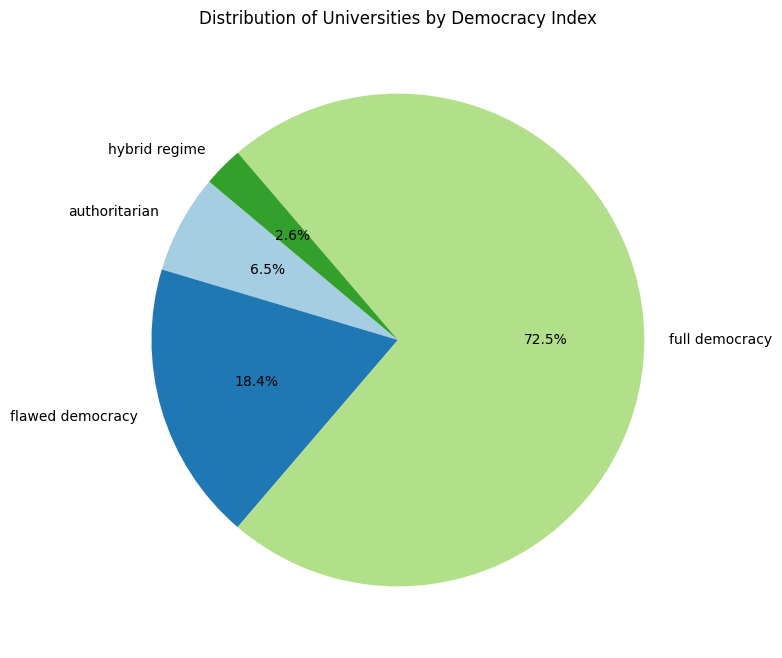

In [44]:
# Creating and displaying a pie chart showing the distribution of universities by democracy index.

import pandas as pd
import matplotlib.pyplot as plt

democracy_university_count = merged_df.groupby('democracy_index_2023')['university_name'].count().reset_index()
democracy_university_count.columns = ['democracy_index_2023', 'university_count']
print(democracy_university_count)

plt.figure(figsize=(8, 8))
plt.pie(
    democracy_university_count['university_count'],
    labels=democracy_university_count['democracy_index_2023'],
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired.colors
)
plt.title('Distribution of Universities by Democracy Index')
plt.show()


## Visualization 6: Average University Total Score by Economic Freedom Index (2024)

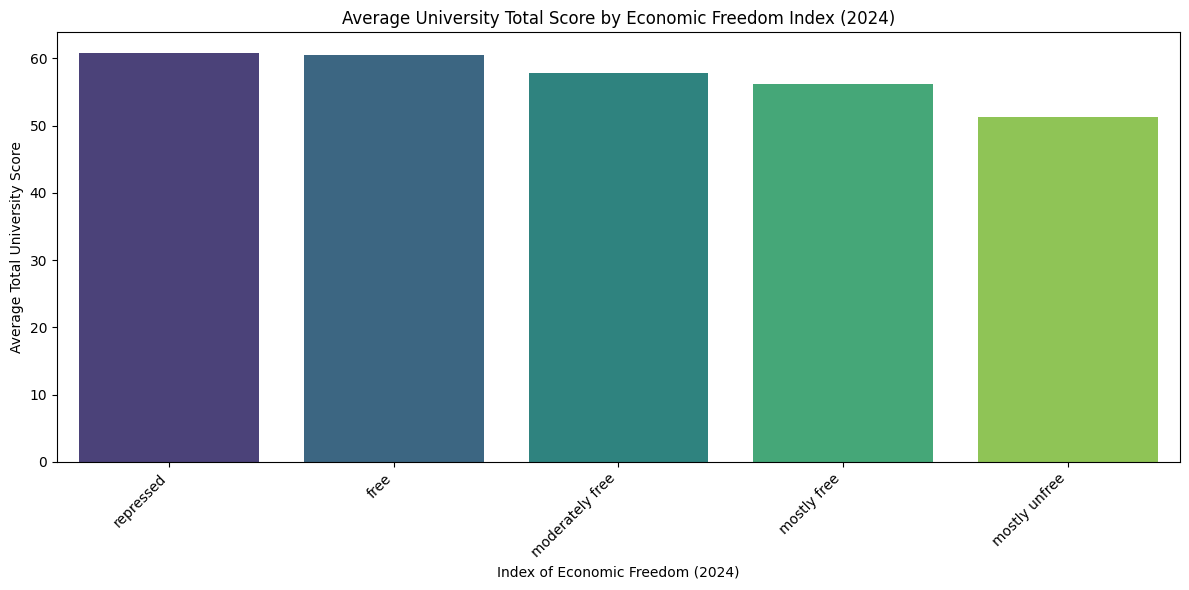

In [45]:
# Creating and displaying a bar chart showing the average university total score by economic freedom index (2024).

import matplotlib.pyplot as plt
import seaborn as sns

# Grouping by 'index_of_economic_freedom_2024' and calculating the mean total score of universities
economic_university_scores = merged_df.groupby('index_of_economic_freedom_2024')['total_score'].mean().reset_index()
economic_university_scores = economic_university_scores.sort_values(by='total_score', ascending=False)

# Plotting the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(
    data=economic_university_scores,
    x='index_of_economic_freedom_2024',
    y='total_score',
    hue='index_of_economic_freedom_2024',
    palette='viridis',
    legend=False 
)
plt.title('Average University Total Score by Economic Freedom Index (2024)')
plt.xlabel('Index of Economic Freedom (2024)')
plt.ylabel('Average Total University Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Visualization 7: Correlation Matrix of Scores

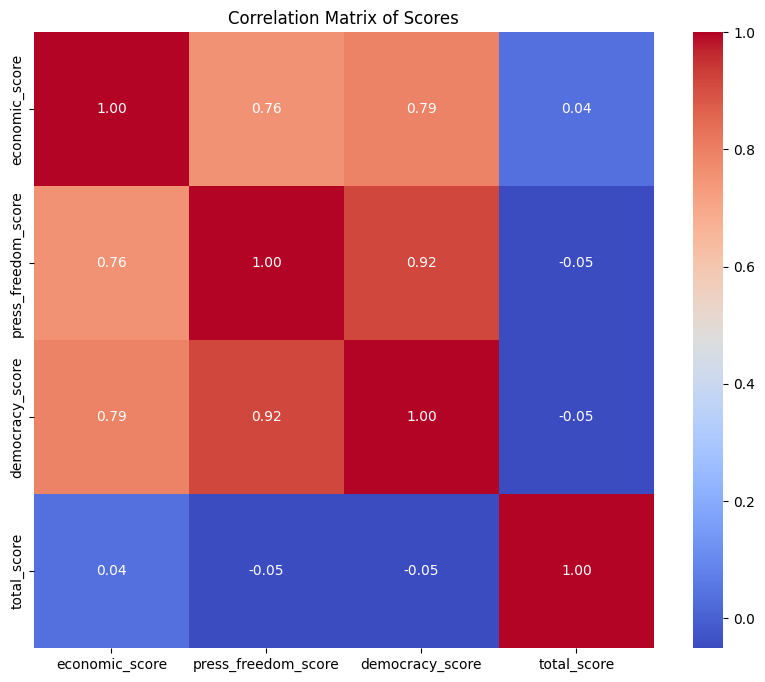

In [46]:
plt.figure(figsize=(10, 8))

# Calculating the correlation matrix for selected columns
correlation_matrix = merged_df[['economic_score', 'press_freedom_score', 'democracy_score', 'total_score']].corr()

# Plotting the heatmap for the correlation matrix with annotations
sns.heatmap(
    correlation_matrix, 
    annot=True,  # Display the correlation values in each cell
    cmap='coolwarm',  # Color map for the heatmap
    fmt='.2f'  # Format the correlation values to two decimal places
)

plt.title('Correlation Matrix of Scores')
plt.show()